<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Extending-lolviz-with-a-unified-display-function-that-chooses-the-best-one-based-on-the-datatype" data-toc-modified-id="Extending-lolviz-with-a-unified-display-function-that-chooses-the-best-one-based-on-the-datatype-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Extending <a href="https://github.com/parrt/lolviz" target="_blank">lolviz</a> with a unified display function that chooses the best one based on the datatype</a></span><ul class="toc-item"><li><span><a href="#Adding-this-unified-display-function" data-toc-modified-id="Adding-this-unified-display-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Adding this unified display function</a></span></li><li><span><a href="#Testing-naively" data-toc-modified-id="Testing-naively-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Testing naively</a></span></li><li><span><a href="#Testing-from-within-a-Jupyter-notebook" data-toc-modified-id="Testing-from-within-a-Jupyter-notebook-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Testing from within a Jupyter notebook</a></span><ul class="toc-item"><li><span><a href="#List" data-toc-modified-id="List-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>List</a></span></li><li><span><a href="#List-of-lists" data-toc-modified-id="List-of-lists-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>List of lists</a></span></li><li><span><a href="#List-of-lists-of-lists???" data-toc-modified-id="List-of-lists-of-lists???-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>List of lists of lists???</a></span></li><li><span><a href="#Tree" data-toc-modified-id="Tree-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Tree</a></span></li><li><span><a href="#Objects" data-toc-modified-id="Objects-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Objects</a></span></li><li><span><a href="#Calls" data-toc-modified-id="Calls-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Calls</a></span><ul class="toc-item"><li><span><a href="#Trying-rcviz" data-toc-modified-id="Trying-rcviz-1.3.6.1"><span class="toc-item-num">1.3.6.1&nbsp;&nbsp;</span>Trying <code>rcviz</code></a></span></li><li><span><a href="#More-experiments-on-a-&quot;triple&quot;-recursive-function" data-toc-modified-id="More-experiments-on-a-&quot;triple&quot;-recursive-function-1.3.6.2"><span class="toc-item-num">1.3.6.2&nbsp;&nbsp;</span>More experiments on a "triple" recursive function</a></span></li></ul></li><li><span><a href="#String" data-toc-modified-id="String-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>String</a></span></li><li><span><a href="#Interactive-test-of-all-the-modes" data-toc-modified-id="Interactive-test-of-all-the-modes-1.3.8"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Interactive test of all the modes</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# Extending [lolviz](https://github.com/parrt/lolviz) with a unified display function that chooses the best one based on the datatype

> See [this issue](https://github.com/parrt/lolviz/issues/27): « Could we add a "super" display function that chooses the best one based on the datatype? »

In [1]:
%load_ext watermark
%watermark -v -m -p lolviz

CPython 3.6.9
IPython 7.16.1

lolviz 1.4.4

compiler   : GCC 8.4.0
system     : Linux
release    : 5.4.0-65-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [164]:
import lolviz

## Adding this unified display function

In [316]:
modes = [ "str", "matrix", "call", "calls", "obj", "tree", "lol", "list", "tree" ]

def unified_lolviz(obj=None, mode:modes=None, **kwargs):
    """ Unified function to display `obj` with lolviz, in Jupyter notebook only."""
    try:
        if mode == "str" or isinstance(obj, str):
            return lolviz.strviz(obj, **kwargs)
        elif "<class 'numpy.ndarray'>" == str(type(obj)):
            # can't use isinstance(obj, np.ndarray) without import numpy!
            return lolviz.matrixviz(obj, **kwargs)
        elif mode == "matrix":
            # Experimental transparent use of np.array()
            try:
                from numpy import array as _
                return lolviz.matrixviz(_(obj), **kwargs)
                del _
            except:
                return lolviz.matrixviz(obj, **kwargs)
        elif mode == "call":
            from sys import _getframe
            return lolviz.callviz(frame=_getframe(1), **kwargs)
            del _getframe
        elif mode == "calls":
            return lolviz.callsviz( **kwargs)
        elif mode == "lol" or isinstance(obj, (tuple, list)) and obj and isinstance(obj[0], (tuple, list)):
            # obj is a list, is non empty, and obj[0] is a list!
            return lolviz.lolviz(obj, **kwargs)
        elif mode == "list" or isinstance(obj, (tuple, list)):
            return lolviz.listviz(obj, **kwargs)
        elif mode == "tree" or isinstance(obj, dict):
            return lolviz.treeviz(obj, **kwargs)  # default
        else:
            return lolviz.objviz(obj, **kwargs)  # default
    except TypeError:
        # unable to use lolviz, let's just return the object,
        # it will be nicely displayed by IPython
        return obj

viz = unified_lolviz

## Testing naively

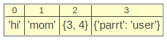

In [95]:
data = ['hi', 'mom', {3, 4}, {"parrt": "user"}]
viz(data)

## Testing from within a Jupyter notebook

I test here all [the features of lolviz](https://github.com/parrt/lolviz#functionality) :

### List

In [96]:
squares = [ i**2 for i in range(10) ]

In [97]:
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

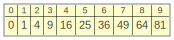

In [98]:
viz(squares)

Under the hood of this unified function `viz`, it was calling `lolvzi.listviz`:

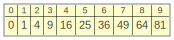

In [99]:
lolviz.listviz(squares)

### List of lists

In [100]:
n, m = 3, 4
example_matrix = [[0 if i != j else 1 for i in range(n)] for j in range(m)]

In [101]:
example_matrix

[[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0]]

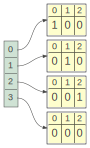

In [102]:
viz(example_matrix)

If we want, we can force the `lolviz.matrixviz` mode:

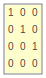

In [103]:
viz(example_matrix, mode='matrix')

And this works without having to manually import numpy or convert the list-of-list to a numpy array!

In [104]:
np?

Object `np` not found.


### List of lists of lists???

In [105]:
n, m, o = 2, 3, 4
example_3D_matrix = [[[
    1 if i < j < k else 0
    for i in range(n)]
    for j in range(m)]
    for k in range(o)]

In [106]:
example_3D_matrix

[[[0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0]],
 [[0, 0], [1, 0], [0, 0]],
 [[0, 0], [1, 0], [1, 1]]]

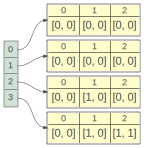

In [107]:
viz(example_3D_matrix)

It works, even if it is not as pretty.

### Tree
Only for binary trees, apparently. Let's try with a dictionary that looks like a binary tree:

In [108]:
anakin = {
    "name": "Anakin Skywalker",
    "son": {
        "name": "Luke Skywalker",
    },
    "daughter": {
        "name": "Leia Skywalker",
    },
}

In [109]:
from pprint import pprint
pprint(anakin)

{'daughter': {'name': 'Leia Skywalker'},
 'name': 'Anakin Skywalker',
 'son': {'name': 'Luke Skywalker'}}


Then by remembering the correction function, we can do:

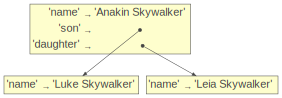

In [110]:
lolviz.treeviz(anakin)

But it's simpler to use the automatic function!

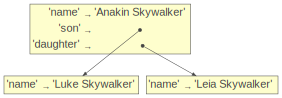

In [111]:
viz(anakin)

It works out of the box for dictionaries!

Let's check another example:

In [116]:
anakin_rec = {
    "name": "Anakin Skywalker",
}

In [117]:
luke_rec = {
    "name": "Luke Skywalker",
    "father": anakin_rec,
}
leia_rec = {
    "name": "Leia Skywalker",
    "father": anakin_rec,
},

In [118]:
anakin_rec.update({
    "son": luke_rec,
    "daughter": leia_rec,
})

In [121]:
from pprint import pprint
pprint(anakin_rec)

{'daughter': ({'father': <Recursion on dict with id=139754864347464>,
               'name': 'Leia Skywalker'},),
 'name': 'Anakin Skywalker',
 'son': {'father': <Recursion on dict with id=139754864347464>,
         'name': 'Luke Skywalker'}}


But it's simpler to use the automatic function!

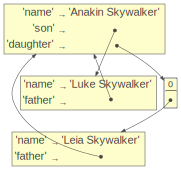

In [124]:
viz(anakin_rec)

It works too for recursive dictionaries!

Let's check another example:

In [125]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        
root = Tree('parrt',
            Tree('mary',
                 Tree('jim',
                      Tree('srinivasan'),
                      Tree('april'))),
            Tree('xue',None,Tree('mike')))

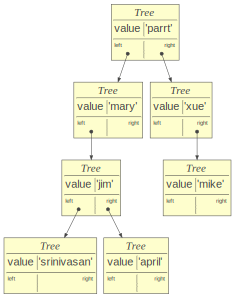

In [126]:
lolviz.treeviz(root)

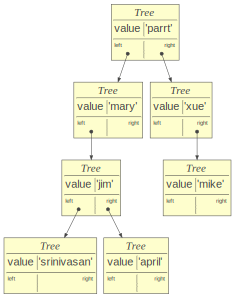

In [127]:
viz(root, mode="tree")

### Objects

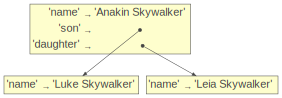

In [128]:
viz(anakin)

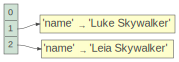

In [129]:
viz(anakin.values())

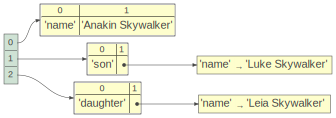

In [130]:
viz(anakin.items())

For complex numbers for instance?

In [131]:
z = 1+4j

In [132]:
print(z)

(1+4j)


In [133]:
viz(z)

OK, this fails.
We could improve `viz` for `complex`, but it's beyond the scope of this small experiment.

### Calls

Let's explore a recursive function:

In [176]:
def factorial(n):
    if n < 0: return 0
    elif n == 0: return 1
    else: return n * factorial(n - 1)

In [177]:
for n in range(12):
    print(f"{n:>2}! = {factorial(n):>10}")

 0! =          1
 1! =          1
 2! =          2
 3! =          6
 4! =         24
 5! =        120
 6! =        720
 7! =       5040
 8! =      40320
 9! =     362880
10! =    3628800
11! =   39916800


And now with some visualization:

In [178]:
from IPython.display import display

This is what `lolviz.callviz` shows:

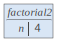

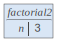

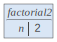

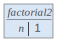

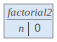

 4! =         24


In [180]:
def factorial2(n):
    display(lolviz.callviz(varnames=["n"]))
    if n < 0: return 0
    elif n == 0: return 1
    else: return n * factorial2(n - 1)
    
n = 4
print(f"{n:>2}! = {factorial2(n):>10}")

We really see the "call stack" as the system keeps track of the nested calls. I like that! 👌

But again, I'm lazy, I want to just use the `viz` function:

In [181]:
def factorial3(n):
    display(viz(varnames=["n"], mode="call"))
    if n < 0: return 0
    elif n == 0: return 1
    else: return n * factorial3(n - 1)

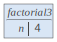

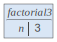

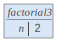

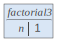

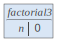

4! = 24


In [183]:
n = 4
print(f"{n}! = {factorial3(n)}")

Okay, by using the optional `frame=` argument of `lolviz.callviz`, and some `sys._getframe` black magic, we can do this!

> See <https://code.activestate.com/recipes/579105-how-a-python-function-can-find-the-name-of-its-cal/>

Can we write a `@show_recursion` function decorator, to automatically do this visualization of recursive calls for us?

In [274]:
def show_recursion(varnames=None):
    def showing_recursion_with_varnames(function):
        nonlocal varnames
        # https://stackoverflow.com/questions/582056/getting-list-of-parameter-names-inside-python-function#4051447
        if varnames is None:
            varnames = function.__code__.co_varnames
        import lolviz
        from IPython.display import display
        from functools import wraps
        @wraps(function)
        def wrapped_function(*args, **kwargs):
            nonlocal display, wraps, varnames, lolviz
            ##print(f"args = {args}, of type = {type(args)}")
            ##print(f"kwargs = {kwargs}, of type = {type(kwargs)}")
            #print(f"varnames = {varnames}")
            display(lolviz.callsviz(varnames=varnames))
            return function(*args, **kwargs)
        return wrapped_function
    return showing_recursion_with_varnames

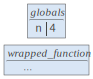

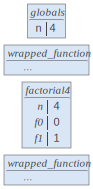

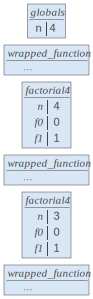

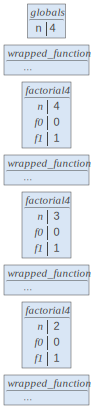

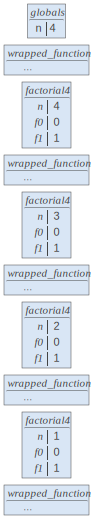

4! = 24


In [275]:
@show_recursion()
def factorial4(n, f0=0, f1=1):
    # this is automatically done: display(viz(varnames=["n"], mode="call"))
    if n < 0: return f0
    elif n == 0: return f1
    else: return n * factorial4(n - 1, f0=f0, f1=f1)
    
n = 4
print(f"{n}! = {factorial4(n)}")

Well it works, but it's not clean.

I would very much prefer something like [rcviz](https://github.com/DamnedFacts/rcviz), or a more powerful tool like [pyan](https://github.com/davidfraser/pyan) or [pycallgraph](http://pycallgraph.slowchop.com/en/master/).

From the standard library, I just discovered the [trace](https://docs.python.org/3.6/library/trace.html) module, but it seems to be oriented for the command line usage, not in a notebook.

#### Trying `rcviz`

In [278]:
!pip install git+https://github.com/DamnedFacts/rcviz

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/DamnedFacts/rcviz to /tmp/pip-req-build-5jsw_yji
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [289]:
import rcviz

4! = 24
callviz: Rendering in inline in Jupyter Notebook


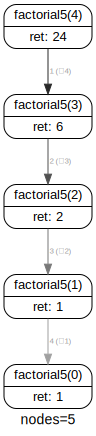

In [290]:
cg = rcviz.CallGraph()

@rcviz.viz(cg)
def factorial5(n):
    if n < 0: return 0
    elif n == 0: return 1
    else: return n * factorial5(n - 1)
    
n = 4
print(f"{n}! = {factorial5(n)}")

cg.render()

4! = 3
callviz: Rendering in inline in Jupyter Notebook


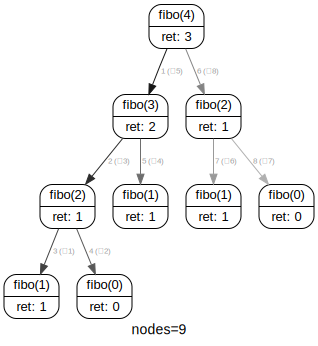

In [291]:
cg = rcviz.CallGraph()

@rcviz.viz(cg)
def fibo(n):
    if n <= 0: return 0
    elif n == 1: return 1
    else: return fibo(n-1) + fibo(n-2)
    
n = 4
print(f"{n}! = {fibo(n)}")

cg.render()

4! = 3
callviz: Rendering in inline in Jupyter Notebook


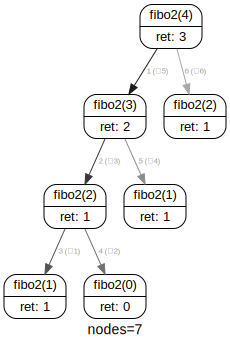

In [292]:
from functools import lru_cache as memoize
cg = rcviz.CallGraph()

@rcviz.viz(cg)
@memoize(maxsize=None)
def fibo2(n):
    if n <= 0: return 0
    elif n == 1: return 1
    else: return fibo2(n-1) + fibo2(n-2)
    
n = 4
print(f"{n}! = {fibo2(n)}")

cg.render()

#### More experiments on a "triple" recursive function

Just to complicate things more, let's write a "fibonnaci" like recursive function that calls three sub-terms:

In [338]:
cg = rcviz.CallGraph()

@rcviz.viz(cg)
def fibo_three(n):
    if   n <= 0: return 0
    elif n == 1: return 1
    elif n == 2: return 1
    else: return fibo_three(n-1) + fibo_three(n-2) + fibo_three(n-3)

5! = 7
callviz: Rendering in inline in Jupyter Notebook


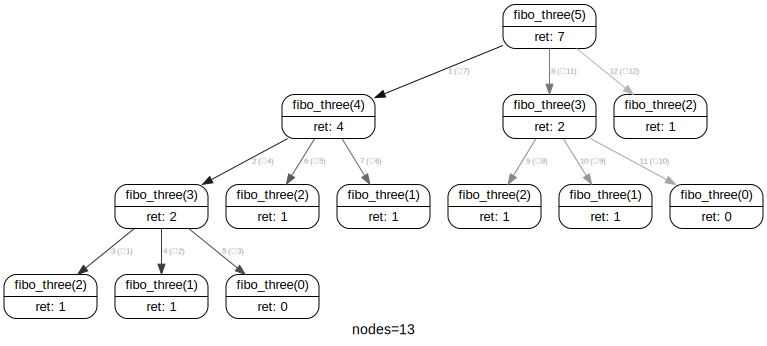

In [339]:
n = 5
print(f"{n}! = {fibo_three(n)}")

cg.render()

Using this non-memoized function leads to already 13 nodes for just $n=5$!

In [340]:
cg = rcviz.CallGraph()

@rcviz.viz(cg)
@memoize(maxsize=None)
def fibo_three_memo(n):
    if   n <= 0: return 0
    elif n == 1: return 1
    elif n == 2: return 1
    else: return fibo_three_memo(n-1) + fibo_three_memo(n-2) + fibo_three_memo(n-3)

5! = 7
callviz: Rendering in inline in Jupyter Notebook


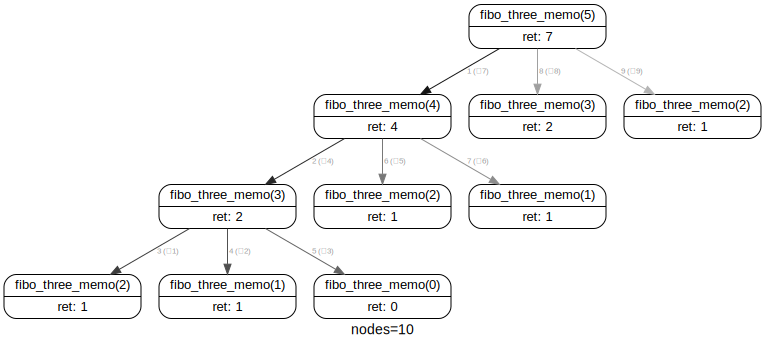

In [341]:
n = 5
print(f"{n}! = {fibo_three_memo(n)}")

cg.render()

As before, we can see that the ternary tree is reduced: there is recursion only on the most lefty branch, thanks to memoization.

##### About `rcviz`
It's an awesome module!
Thanks to [@DamnedFacts/](https://github.com/DamnedFacts/) for having [his up-to-date fork](https://github.com/DamnedFacts/rcviz).

### String

In [294]:
import string
string.hexdigits

'0123456789abcdefABCDEF'

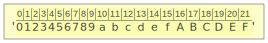

In [295]:
viz(string.hexdigits)

### Interactive test of all the modes

Using [IPyWidgets](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Widget-abbreviations):

In [317]:
from pprint import pprint
from ipywidgets import interact

Trying on all the objects used above:

In [321]:
objs = [
    string.ascii_lowercase,
    lolviz,
    data,
    squares,
    example_matrix,
    example_3D_matrix,
    anakin,
    anakin_rec,
    leia_rec,
    luke_rec,
    root,
    z,
]

And the different modes, except for "call" and "calls" which only work inside functions:

In [326]:
partial_modes = ['str', 'matrix', 'obj', 'tree', 'lol', 'list']

In [329]:
@interact(
    obj = objs,
    mode = partial_modes,
)
def showcase_unified_viz(obj, mode):
    print(f"\nObject of type = {type(obj)}, for mode = {mode}")
    pprint(obj)
    return viz(obj, mode=mode)
    return lolviz.strviz(obj)


interactive(children=(Dropdown(description='obj', options=('abcdefghijklmnopqrstuvwxyz', <module 'lolviz' from…

## Conclusion
Who it was interesting!

That's it. See [this other example](https://github.com/parrt/lolviz/blob/master/examples.ipynb) for more.